# Amazon-Flex Metrics (KPI Report and Ideal Fuel Analysis) - Juan Moctezuma

The following script generates a simple KPI Report (plots included) and an Ideal Fuel Analysis (connected scatterplot). The data comes from the Amazon-Flex_CDF.csv located in the CLEANED_DATA folder which contains data from the RDF (Raw Data File) CSV file processed by an ETL data pipe. 
  
No historical data (incomplete information compiled on year 2020; which exists prior to the creation of this project) is included. 

...

## 1. Before performing any report or analysis

The first step is to install the required libraries.

In [ ]:
#!pip install pandas

In [ ]:
#!pip install matplotlib 

In [ ]:
#!pip install numpy

Then import the libraries that you installed.

In [1]:
import os
import datetime
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.ticker import FormatStrFormatter
import matplotlib.dates as mdates
%matplotlib inline

We need to get our data. Once the cleaned data csv is placed on the correct folder, you may use pandas to read the file and create dataframe. A common practice is to print the data from your csv to make sure everything is loaded correctly.

In [2]:
cwd = os.getcwd() # dirname(abspath(__file__))
BASE_DIR = os.path.dirname(cwd)
CLEAN_DATA_DIR = os.path.join(BASE_DIR, 'CLEANED_DATA')

In [3]:
os.listdir(CLEAN_DATA_DIR)

['.DS_Store', 'Amazon-Flex_CDF.csv']

In [4]:
cdf = os.path.join(CLEAN_DATA_DIR, 'Amazon-Flex_CDF.csv')
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
df = pd.read_csv(cdf)
df_2 = pd.read_csv(cdf)
df_3 = pd.read_csv(cdf)

In [5]:
#df['DATE'] = pd.to_datetime(df['DATE'], infer_datetime_format = True)

The 'df.dtypes' component prints out the cleaned data file and its respective data types.

In [6]:
df.dtypes

DATE                         object
WAREHOUSE                    object
START_TIME                   object
SHIFT_DURATION_HR           float64
OPERATING_VEHICLE            object
STARTING_MILEAGE              int64
FINAL_MILEAGE                 int64
ROUTE_MILEAGE                 int64
NEIGHBORHOOD(S)              object
WHS-NBHD_MIN-APPROX-DIST    float64
FUEL_TOTAL                  float64
FUEL_GAL                    float64
PRICE_PER_GAL               float64
OIL_COMPANY                  object
GAS_CATEGORY                 object
GAS_STATION_ADDRESS          object
GS-WHS_DIST                 float64
TOTAL_PKGS                    int64
ON-TIME_PKGS                  int64
RETURNED_PKGS                 int64
LATE_PKGS                     int64
MISSING_ORDERS                int64
ON-TIME_RATIO               float64
PDD_FAIL_RATIO              float64
LATE-PKGE_RATIO             float64
RCVD-PKGE_RATIO             float64
ON_TIME_ARR                   int64
NO_TRAFFIC                  

We now display the current data from the CDF (Cleaned Data File). 

In [7]:
df.head(n=50)

,DATE,WAREHOUSE,START_TIME,SHIFT_DURATION_HR,OPERATING_VEHICLE,STARTING_MILEAGE,FINAL_MILEAGE,ROUTE_MILEAGE,NEIGHBORHOOD(S),WHS-NBHD_MIN-APPROX-DIST,FUEL_TOTAL,FUEL_GAL,PRICE_PER_GAL,OIL_COMPANY,GAS_CATEGORY,GAS_STATION_ADDRESS,GS-WHS_DIST,TOTAL_PKGS,ON-TIME_PKGS,RETURNED_PKGS,LATE_PKGS,MISSING_ORDERS,ON-TIME_RATIO,PDD_FAIL_RATIO,LATE-PKGE_RATIO,RCVD-PKGE_RATIO,ON_TIME_ARR,NO_TRAFFIC,NO_WHS_DELAY,NO_BAD_WEATHER,NO_OTHER_DELAYS
0,1/2/21,DSD3 (National City),5:00 PM,3.0,Sedan (Jetta VW),94918,94939,21,BONITA / NATIONAL CITY,4.5,11.04,3.085,3.579,Shell Oil Company,V-Power,3230 National City Blvd,1.3,54,54,0,0,0,1.000000,0.000000,0.000000,1.000000,1,1,1,1,1
1,1/8/21,DSD3 (National City),5:00 PM,4.0,Sedan (Jetta VW),94975,95001,26,MISSION BEACH / OCEAN BEACH,13.7,11.02,3.062,3.599,Shell Oil Company,V-Power,3230 National City Blvd,1.3,38,38,0,0,0,1.000000,0.000000,0.000000,1.000000,1,1,1,1,1
2,1/15/21,DSD3 (National City),5:30 PM,5.5,Sedan (Jetta VW),95145,95177,32,DOWNTOWN AREA / LOGAN,7.6,20.22,5.525,3.659,Shell Oil Company,V-Power,3230 National City Blvd,1.3,33,27,2,4,0,0.870968,0.060606,0.129032,0.939394,1,1,0,1,1
3,1/22/21,DSD3 (National City),5:00 PM,4.0,Sedan (Jetta VW),95217,95234,17,HILLCREST / MONTECITO POINT,8.7,11.10,3.002,3.699,Shell Oil Company,V-Power,3230 National City Blvd,1.3,40,40,0,0,0,1.000000,0.000000,0.000000,1.000000,1,1,1,1,1
4,1/29/21,DSD3 (National City),5:00 PM,3.5,Sedan (Jetta VW),95275,95312,37,EL CAJON / SPRING VALLEY / LA MESA,13.0,11.50,3.027,3.799,Shell Oil Company,V-Power,3230 National City Blvd,1.3,30,30,0,0,0,1.000000,0.000000,0.000000,1.000000,1,1,1,0,1
5,2/5/21,DSD3 (National City),5:00 PM,4.5,Sedan (Jetta VW),95362,95385,23,NORTH PARK,8.5,11.30,2.974,3.799,Shell Oil Company,V-Power,3230 National City Blvd,1.3,39,39,0,0,0,1.000000,0.000000,0.000000,1.000000,1,1,1,1,1
6,2/12/21,DSD3 (National City),5:00 PM,4.5,Sedan (Jetta VW),95422,95471,49,SAN YSIDRO / OTAY MESA / OCEAN VIEW,9.3,11.37,3.133,3.629,Shell Oil Company,Plus,3230 National City Blvd,1.3,31,30,1,0,0,1.000000,0.032258,0.000000,0.967742,1,1,1,1,1
7,2/13/21,DSD3 (National City),5:00 PM,3.5,Sedan (Jetta VW),95501,95532,31,PALM CITY / OTAY / OCEAN VIEW,6.0,11.30,3.114,3.629,Shell Oil Company,Plus,3230 National City Blvd,1.3,46,46,0,0,0,1.000000,0.000000,0.000000,1.000000,1,1,1,1,1
8,2/19/21,DSD3 (National City),5:00 PM,2.8,Sedan (Jetta VW),95557,95588,31,EL CAJON,13.0,11.40,2.954,3.859,Chevron Corporation,Regular,604 Dennery Rd,9.0,26,26,0,0,0,1.000000,0.000000,0.000000,1.000000,1,1,1,1,1
9,2/26/21,DSD3 (National City),5:00 PM,2.9,Sedan (Jetta VW),95642,95676,34,SAN YSIDRO / OTAY MESA / OCEAN VIEW,9.3,11.23,3.103,3.619,Shell Oil Company,Regular,3230 National City Blvd,1.3,28,28,0,0,0,1.000000,0.000000,0.000000,1.000000,1,1,1,1,1


## 2. Package Delivery Chart

In [8]:
dates = np.array(df['DATE'])
dates = list(dates)

on_time_pkgs = np.array(df['ON-TIME_PKGS'])
on_time_pkgs = list(on_time_pkgs)

total_pkgs = np.array(df['TOTAL_PKGS'])
total_pkgs = list(total_pkgs)

return_pkgs = np.array(df['RETURNED_PKGS'])
return_pkgs = list(return_pkgs)

#late_pkgs = np.array(df['LATE_PKGS'])
#late_pkgs = list(late_pkgs)

missing_pkgs = np.array(df['MISSING_ORDERS'])
missing_pkgs = list(missing_pkgs)

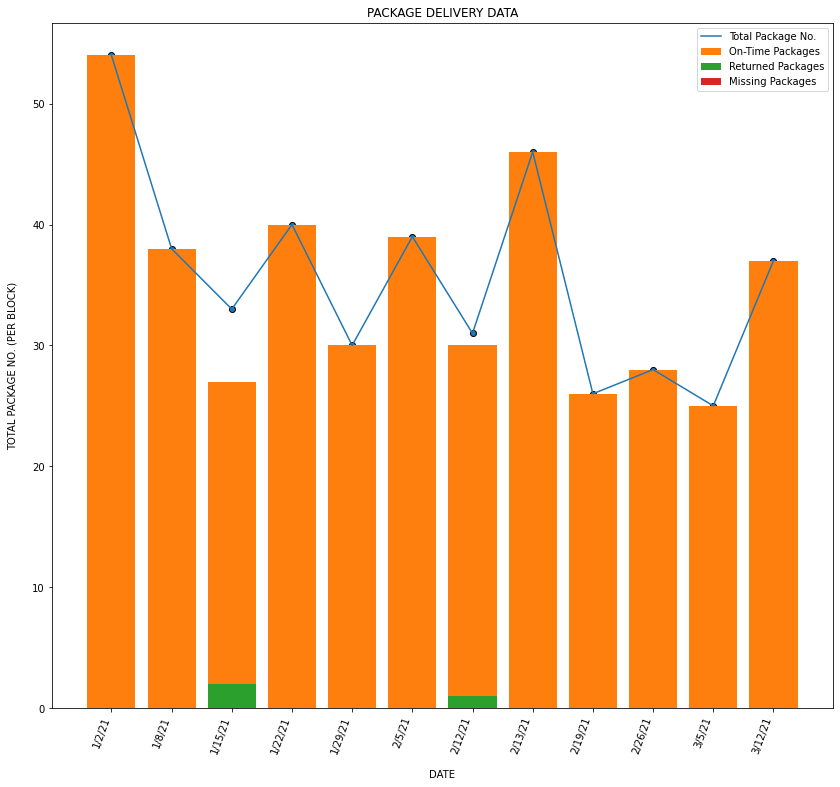

In [9]:
fig, ax = plt.subplots()

plt.gcf().autofmt_xdate(rotation = 70)
#plt.bar(dates, total_pkgs, label="Total Packages")
#plt.bar(dates, late_pkgs, label="Late Packages")

plt.plot(dates, total_pkgs, label='Total Package No.')
plt.scatter(dates, total_pkgs, edgecolor = 'black', linewidth = 1, marker = 'o')

plt.bar(dates, on_time_pkgs, label="On-Time Packages")
plt.bar(dates, return_pkgs, label="Returned Packages")
plt.bar(dates, missing_pkgs, label="Missing Packages")

#ax.legend(bbox_to_anchor=(, 0.05))
plt.title('PACKAGE DELIVERY DATA')
plt.xlabel("DATE", labelpad = 15)
plt.ylabel("TOTAL PACKAGE NO. (PER BLOCK)", labelpad = 15)
#plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.1)
plt.legend()
plt.gcf().set_size_inches((14, 14))
plt.show()

## 3. KPI METRICS (REPORT AND SUCCESS KPI CHART)

In [10]:
df_2.drop('WAREHOUSE', axis=1, inplace=True)
df_2.drop('START_TIME', axis=1, inplace=True)
df_2.drop('SHIFT_DURATION_HR', axis=1, inplace=True)
df_2.drop('OPERATING_VEHICLE', axis=1, inplace=True)
df_2.drop('STARTING_MILEAGE', axis=1, inplace=True)
df_2.drop('FINAL_MILEAGE', axis=1, inplace=True)
df_2.drop('ROUTE_MILEAGE', axis=1, inplace=True)
df_2.drop('NEIGHBORHOOD(S)', axis=1, inplace=True)
df_2.drop('WHS-NBHD_MIN-APPROX-DIST', axis=1, inplace=True)
df_2.drop('FUEL_TOTAL', axis=1, inplace=True)
df_2.drop('FUEL_GAL', axis=1, inplace=True)
df_2.drop('PRICE_PER_GAL', axis=1, inplace=True)
df_2.drop('OIL_COMPANY', axis=1, inplace=True)
df_2.drop('GAS_CATEGORY', axis=1, inplace=True)
df_2.drop('GAS_STATION_ADDRESS', axis=1, inplace=True)
df_2.drop('GS-WHS_DIST', axis=1, inplace=True)
df_2.drop('PDD_FAIL_RATIO', axis=1, inplace=True)
df_2.drop('LATE-PKGE_RATIO', axis=1, inplace=True)

kpi_math = df_2.loc[:, "ON-TIME_RATIO":"NO_OTHER_DELAYS"]
df_2['KPI_RESULTS'] = kpi_math.mean(axis=1)
df_2['KPI_PERCENTAGES'] = pd.Series(["{0:.2f}%".format(val * 100) for val in df_2['KPI_RESULTS']], index = df_2.index)

### KPI REPORT

In [11]:
# THE FOLLOWING DATA IS THE ACTUAL KPI REPORT
df_2.head(n=50)

,DATE,TOTAL_PKGS,ON-TIME_PKGS,RETURNED_PKGS,LATE_PKGS,MISSING_ORDERS,ON-TIME_RATIO,RCVD-PKGE_RATIO,ON_TIME_ARR,NO_TRAFFIC,NO_WHS_DELAY,NO_BAD_WEATHER,NO_OTHER_DELAYS,KPI_RESULTS,KPI_PERCENTAGES
0,1/2/21,54,54,0,0,0,1.000000,1.000000,1,1,1,1,1,1.000000,100.00%
1,1/8/21,38,38,0,0,0,1.000000,1.000000,1,1,1,1,1,1.000000,100.00%
2,1/15/21,33,27,2,4,0,0.870968,0.939394,1,1,0,1,1,0.830052,83.01%
3,1/22/21,40,40,0,0,0,1.000000,1.000000,1,1,1,1,1,1.000000,100.00%
4,1/29/21,30,30,0,0,0,1.000000,1.000000,1,1,1,0,1,0.857143,85.71%
5,2/5/21,39,39,0,0,0,1.000000,1.000000,1,1,1,1,1,1.000000,100.00%
6,2/12/21,31,30,1,0,0,1.000000,0.967742,1,1,1,1,1,0.995392,99.54%
7,2/13/21,46,46,0,0,0,1.000000,1.000000,1,1,1,1,1,1.000000,100.00%
8,2/19/21,26,26,0,0,0,1.000000,1.000000,1,1,1,1,1,1.000000,100.00%
9,2/26/21,28,28,0,0,0,1.000000,1.000000,1,1,1,1,1,1.000000,100.00%


In [12]:
dates_2 = np.array(df_2['DATE'])
dates_2 = list(dates_2)

kpi_res = np.array(df_2['KPI_RESULTS'])
kpi_res = list(kpi_res)

In [13]:
df_2.dtypes

DATE                object
TOTAL_PKGS           int64
ON-TIME_PKGS         int64
RETURNED_PKGS        int64
LATE_PKGS            int64
MISSING_ORDERS       int64
ON-TIME_RATIO      float64
RCVD-PKGE_RATIO    float64
ON_TIME_ARR          int64
NO_TRAFFIC           int64
NO_WHS_DELAY         int64
NO_BAD_WEATHER       int64
NO_OTHER_DELAYS      int64
KPI_RESULTS        float64
KPI_PERCENTAGES     object
dtype: object

### DELIVERY PERFORMANCE DATA (SUCCESS KPI PERCENTAGE PER BLOCK) 

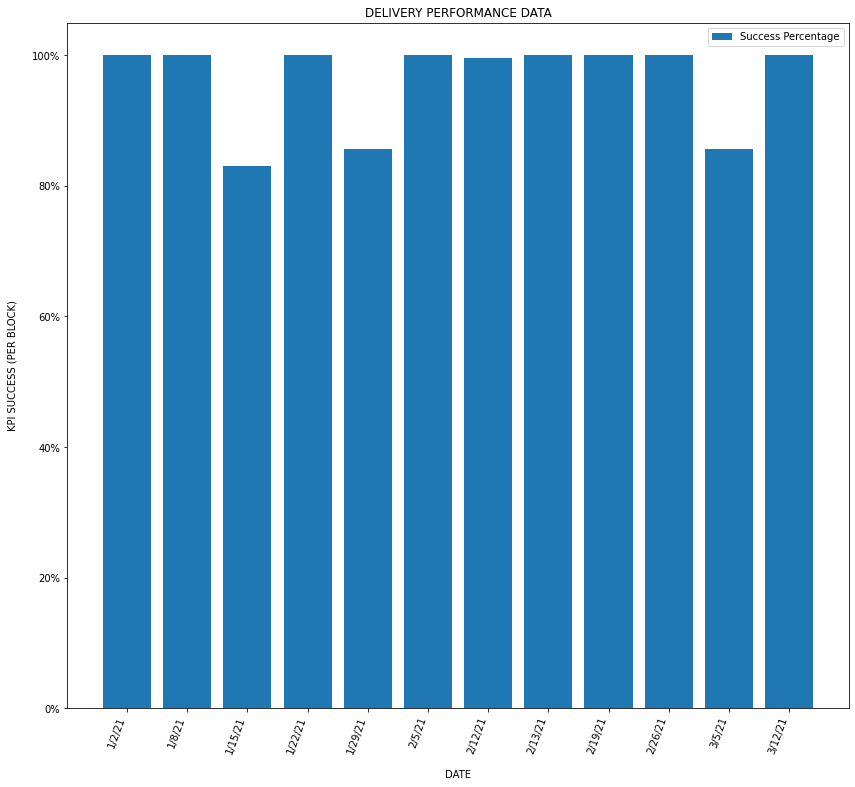

In [14]:
fig, ax = plt.subplots()

plt.gcf().autofmt_xdate(rotation = 70)
plt.bar(dates_2, kpi_res, label="Success Percentage")

ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))

plt.title('DELIVERY PERFORMANCE DATA')
plt.xlabel("DATE", labelpad = 15)
plt.ylabel("KPI SUCCESS (PER BLOCK)", labelpad = 15)
#plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.1)
plt.legend()
plt.gcf().set_size_inches((14, 14))
plt.show()

# KPI SUCCESS PERCENTAGE is the average from the following parameters or columns: 
# A) ON-TIME_ARRIVAL
# B) NO_TRAFFIC
# C) NO_WHS_DELAY
# D) NO_BAD_WEATHER
# E) NO_OTHER_DELAYS
# F) KPI_RESULTS
# G) KPI_PERCENTAGES
# Points A-F are represented by a 0, 1 or decimal number < 1.0

## 4. IDEAL FUEL ANALYSIS (REPORT AND PLOT)

In [15]:
df_3.drop('WAREHOUSE', axis=1, inplace=True)
df_3.drop('START_TIME', axis=1, inplace=True)
df_3.drop('SHIFT_DURATION_HR', axis=1, inplace=True)
df_3.drop('OPERATING_VEHICLE', axis=1, inplace=True)
df_3.drop('STARTING_MILEAGE', axis=1, inplace=True)
df_3.drop('FINAL_MILEAGE', axis=1, inplace=True)
df_3.drop('NEIGHBORHOOD(S)', axis=1, inplace=True)
df_3.drop('WHS-NBHD_MIN-APPROX-DIST', axis=1, inplace=True)
df_3.drop('OIL_COMPANY', axis=1, inplace=True)
df_3.drop('GAS_CATEGORY', axis=1, inplace=True)
df_3.drop('GAS_STATION_ADDRESS', axis=1, inplace=True)
df_3.drop('GS-WHS_DIST', axis=1, inplace=True)
df_3.drop('TOTAL_PKGS', axis=1, inplace=True)
df_3.drop('ON-TIME_PKGS', axis=1, inplace=True)
df_3.drop('RETURNED_PKGS', axis=1, inplace=True)
df_3.drop('LATE_PKGS', axis=1, inplace=True)
df_3.drop('MISSING_ORDERS', axis=1, inplace=True)
df_3.drop('ON-TIME_RATIO', axis=1, inplace=True)
df_3.drop('PDD_FAIL_RATIO', axis=1, inplace=True)
df_3.drop('LATE-PKGE_RATIO', axis=1, inplace=True)
df_3.drop('RCVD-PKGE_RATIO', axis=1, inplace=True)
df_3.drop('ON_TIME_ARR', axis=1, inplace=True)
df_3.drop('NO_TRAFFIC', axis=1, inplace=True)
df_3.drop('NO_WHS_DELAY', axis=1, inplace=True)
df_3.drop('NO_BAD_WEATHER', axis=1, inplace=True)
df_3.drop('NO_OTHER_DELAYS', axis=1, inplace=True)

### IDEAL FUEL REPORT

In [16]:
#df_3.head(n=50)

In [17]:
# Columns '1' to '5' on the following report come from the clean data file (CDF)
# Column titled as 'IDEAL_FUEL_TOTAL' is generated by the value from 'PRICE_PER_GAL' MULTIPLIED BY 3;
# Why 3? Because ideally a 4-cylinder vehicle needs only 3 GALLONS of fuel to complete a block...

# 'IDEAL-ACTUAL_COST_DIFF' is the difference between the actual gas expense during one block MINUS 'Ideal' amount

df_3['IDEAL_FUEL_TOTAL'] = pd.Series([round((val * 3), 2) for val in df_3['PRICE_PER_GAL']], index = df_3.index)
df_3['IDEAL-ACTUAL_COST_DIFF'] = df_3['FUEL_TOTAL'] - df_3['IDEAL_FUEL_TOTAL']

In [18]:
df_3.head(n=50)

,DATE,ROUTE_MILEAGE,FUEL_TOTAL,FUEL_GAL,PRICE_PER_GAL,IDEAL_FUEL_TOTAL,IDEAL-ACTUAL_COST_DIFF
0,1/2/21,21,11.04,3.085,3.579,10.74,0.30
1,1/8/21,26,11.02,3.062,3.599,10.80,0.22
2,1/15/21,32,20.22,5.525,3.659,10.98,9.24
3,1/22/21,17,11.10,3.002,3.699,11.10,0.00
4,1/29/21,37,11.50,3.027,3.799,11.40,0.10
5,2/5/21,23,11.30,2.974,3.799,11.40,-0.10
6,2/12/21,49,11.37,3.133,3.629,10.89,0.48
7,2/13/21,31,11.30,3.114,3.629,10.89,0.41
8,2/19/21,31,11.40,2.954,3.859,11.58,-0.18
9,2/26/21,34,11.23,3.103,3.619,10.86,0.37


### IDEAL FUEL COST PLOT

In [19]:
dates_3 = df_3['DATE']
fuel_tot = df_3['FUEL_TOTAL']
ideal_fuel_tot = df_3['IDEAL_FUEL_TOTAL']
ideal_vs_actual = df_3['IDEAL-ACTUAL_COST_DIFF']

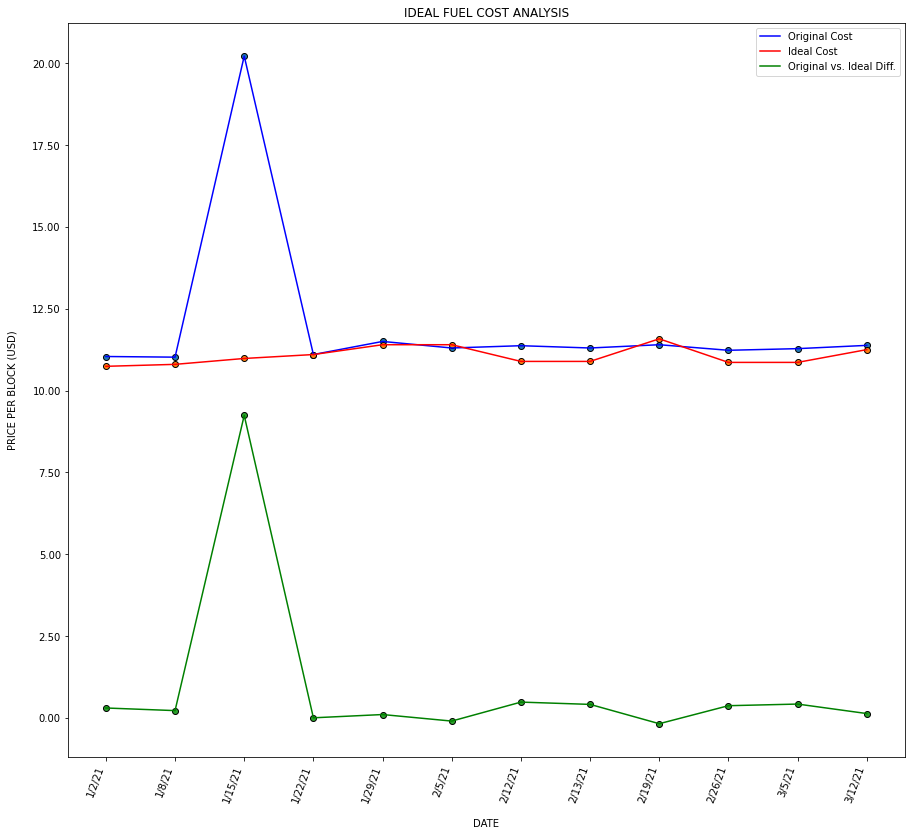

In [20]:
fig, ax = plt.subplots()

# Using plot and scatter functions create a connected scatter plot
orig = plt.plot(dates_3, fuel_tot, color='blue', label='Original Cost')
orig_scatter = plt.scatter(dates_3, fuel_tot, edgecolor = 'black', linewidth = 1, marker = 'o')

ideal = plt.plot(dates_3, ideal_fuel_tot, color='red', label='Ideal Cost')
ideal_scatter = plt.scatter(dates_3, ideal_fuel_tot, edgecolor = 'black', linewidth = 1, marker = 'o')

diff = plt.plot(dates_3, ideal_vs_actual, color='green', label='Original vs. Ideal Diff.')
diff_scatter = plt.scatter(dates_3, ideal_vs_actual, edgecolor = 'black', linewidth = 1, marker = 'o')

plt.legend(loc='best')
plt.title('IDEAL FUEL COST ANALYSIS')

ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.gcf().autofmt_xdate(rotation = 70)

plt.xlabel("DATE", labelpad = 15)
plt.ylabel("PRICE PER BLOCK (USD)", labelpad = 15)
plt.gcf().set_size_inches((15, 15))
plt.show()
#plt.show(block=False)

# 5. Conclusion

The package delivery data reflects that the majority of packages got delivered on-time.

The delivery performance data (KPI success percentages) reflects that only a few blocks reflect less than 100% sucess data.

With the exception of 1 outlier, the differences between the ideal prices & actual fuel expenses are less than 1 USD.